## Rating 데이터 기본 EDA
1. 데이터 로드 및 기본 정보 - 데이터 크기, 컬럼, 샘플 확인
1. 데이터 타입 및 Info - 데이터 타입과 메모리 사용량
1. 결측치 분석 및 기본 통계 - 결측치 확인, 기술 통계
1. Rating 분포 분석 - 평점 분포, 히스토그램, 파이차트, 박스플롯
1. User 분석 - 사용자별 평점 수, Top 20 활발한 사용자, 평균 평점 분포, 상관관계
1. ISBN (책) 분석 - 책별 평점 수, Top 20 인기 책, 평균 평점 분포, 상관관계
1. 데이터 희소성 분석 - Sparsity 계산, Cold start 분석, 누적 분포, 평점 매트릭스 히트맵
1. Rating 분포 세부 분석 - 고/중/저평점 비율, 누적 분포
1. 종합 요약 통계 - 주요 지표 종합
1. 종합 시각화 대시보드 - 전체 EDA를 한눈에 볼 수 있는 종합 시각화

### 데이터 로드 및 기본 정보 - 데이터 크기, 컬럼, 샘플 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 스타일 설정
plt.style.use('default')
sns.set_palette("husl")

# 데이터 로드
data_path = Path('../../data/train_ratings.csv')
ratings = pd.read_csv(data_path)

print("=" * 80)
print("TRAIN RATINGS DATASET - BASIC EDA")
print("=" * 80)
print(f"\nTotal number of ratings: {len(ratings):,}")
print(f"Number of columns: {len(ratings.columns)}")
print(f"Columns: {list(ratings.columns)}")

# 첫 몇 행 확인
ratings.head(20)

TRAIN RATINGS DATASET - BASIC EDA

Total number of ratings: 306,795
Number of columns: 3
Columns: ['user_id', 'isbn', 'rating']


,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
5,219008,0002005018,7
6,263325,0002005018,5
7,2954,0060973129,8
8,35704,0374157065,6
9,110912,0374157065,10


### 데이터 타입 및 Info - 데이터 타입과 메모리 사용량

In [2]:
# 데이터 타입 및 기본 정보
print("Data types:")
print(ratings.dtypes)
print("\n" + "=" * 80)

ratings.info()

Data types:
user_id     int64
isbn       object
rating      int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


### 결측치 분석 및 기본 통계 - 결측치 확인, 기술 통계

In [3]:
# 결측치 분석
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = ratings.isnull().sum()
missing_pct = (ratings.isnull().sum() / len(ratings)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df)

# 기본 통계
print("\n" + "=" * 80)
print("BASIC STATISTICS")
print("=" * 80)
print(ratings.describe())

MISSING VALUES ANALYSIS
         Missing Count  Percentage
user_id              0         0.0
isbn                 0         0.0
rating               0         0.0

BASIC STATISTICS
             user_id         rating
count  306795.000000  306795.000000
mean   136128.416099       7.069714
std     80512.194379       2.433217
min         8.000000       1.000000
25%     67591.000000       6.000000
50%    134076.000000       8.000000
75%    206438.000000       9.000000
max    278854.000000      10.000000


### Rating 분포 분석 - 평점 분포, 히스토그램, 파이차트, 박스플롯

RATING DISTRIBUTION ANALYSIS
Unique ratings: 10
Rating range: 1 - 10
Mean rating: 7.07
Median rating: 8.00
Std rating: 2.43

Rating value counts:
rating
1     13249
2     12929
3     10520
4     12707
5     14111
6     25311
7     52928
8     73593
9     48673
10    42774
Name: count, dtype: int64


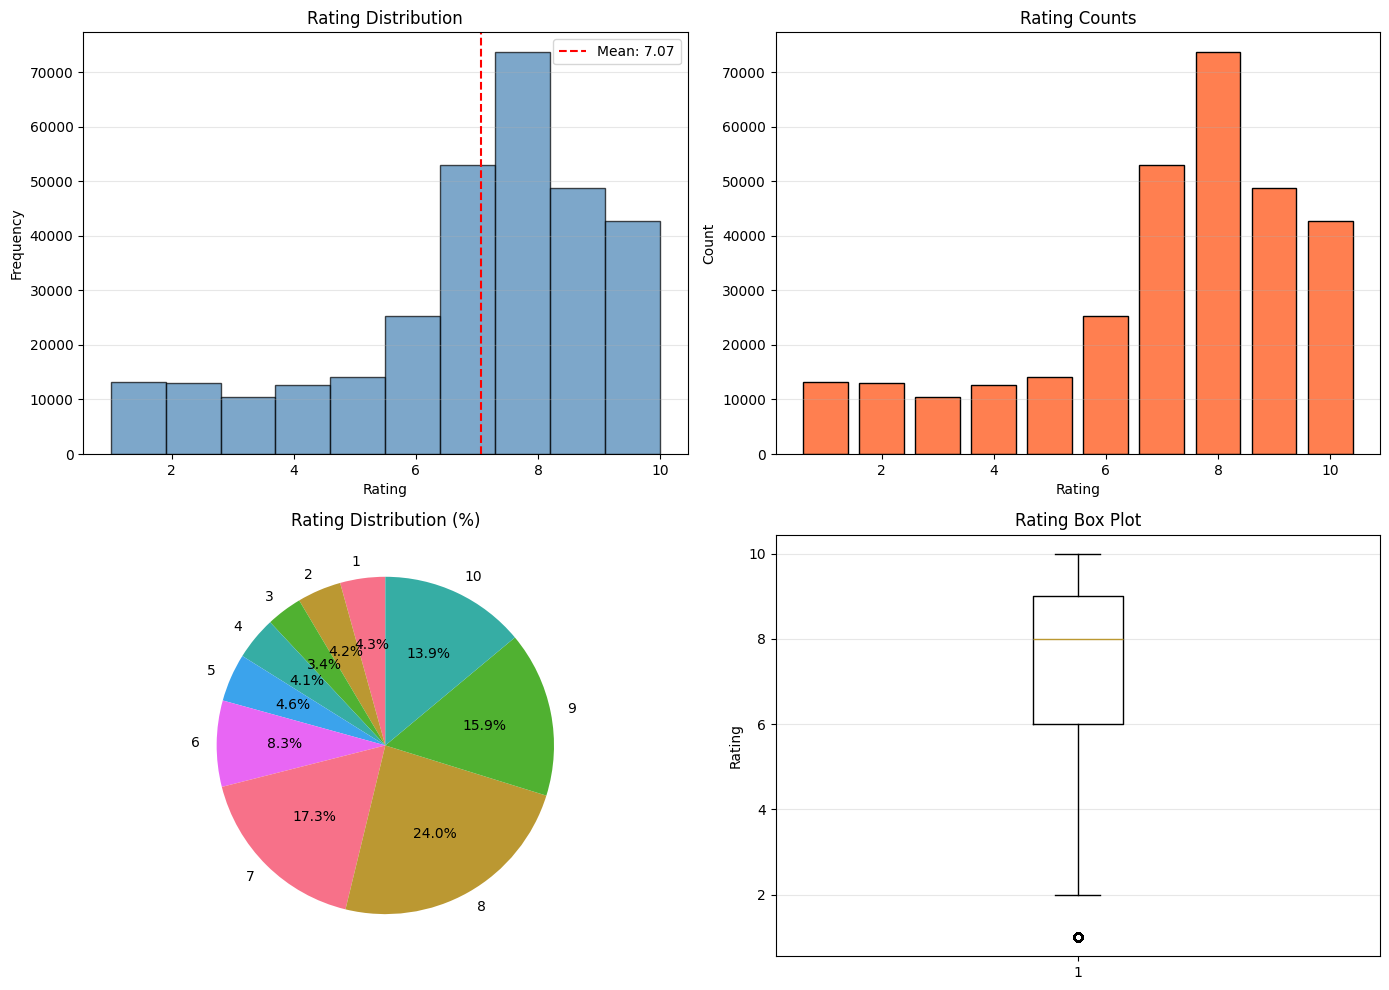

In [4]:
# Rating 분포 분석
print("=" * 80)
print("RATING DISTRIBUTION ANALYSIS")
print("=" * 80)

print(f"Unique ratings: {ratings['rating'].nunique()}")
print(f"Rating range: {ratings['rating'].min()} - {ratings['rating'].max()}")
print(f"Mean rating: {ratings['rating'].mean():.2f}")
print(f"Median rating: {ratings['rating'].median():.2f}")
print(f"Std rating: {ratings['rating'].std():.2f}")

print(f"\nRating value counts:")
print(ratings['rating'].value_counts().sort_index())

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rating 분포 (히스토그램)
axes[0, 0].hist(ratings['rating'], bins=ratings['rating'].nunique(), edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(ratings['rating'].mean(), color='red', linestyle='--', label=f'Mean: {ratings["rating"].mean():.2f}')
axes[0, 0].legend()

# Rating 비율 (바차트)
rating_counts = ratings['rating'].value_counts().sort_index()
axes[0, 1].bar(rating_counts.index, rating_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Rating Counts')
axes[0, 1].grid(axis='y', alpha=0.3)

# Rating 비율 (파이차트)
axes[1, 0].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Rating Distribution (%)')

# Rating 박스플롯
axes[1, 1].boxplot(ratings['rating'], vert=True)
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_title('Rating Box Plot')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### User 분석 - 사용자별 평점 수, Top 20 활발한 사용자, 평균 평점 분포, 상관관계

USER ANALYSIS
Total users: 59,803
Total ratings: 306,795
Average ratings per user: 5.13

Ratings per user statistics:
count    59803.000000
mean         5.130094
std         35.517624
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5520.000000
Name: count, dtype: float64

Top 20 users by rating count:
user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
235105     812
76499      810
171118     771
16795      760
248718     747
56399      673
197659     637
35859      614
185233     557
95359      488
114368     483
101851     452
158295     444
177458     417
182085     409
Name: count, dtype: int64


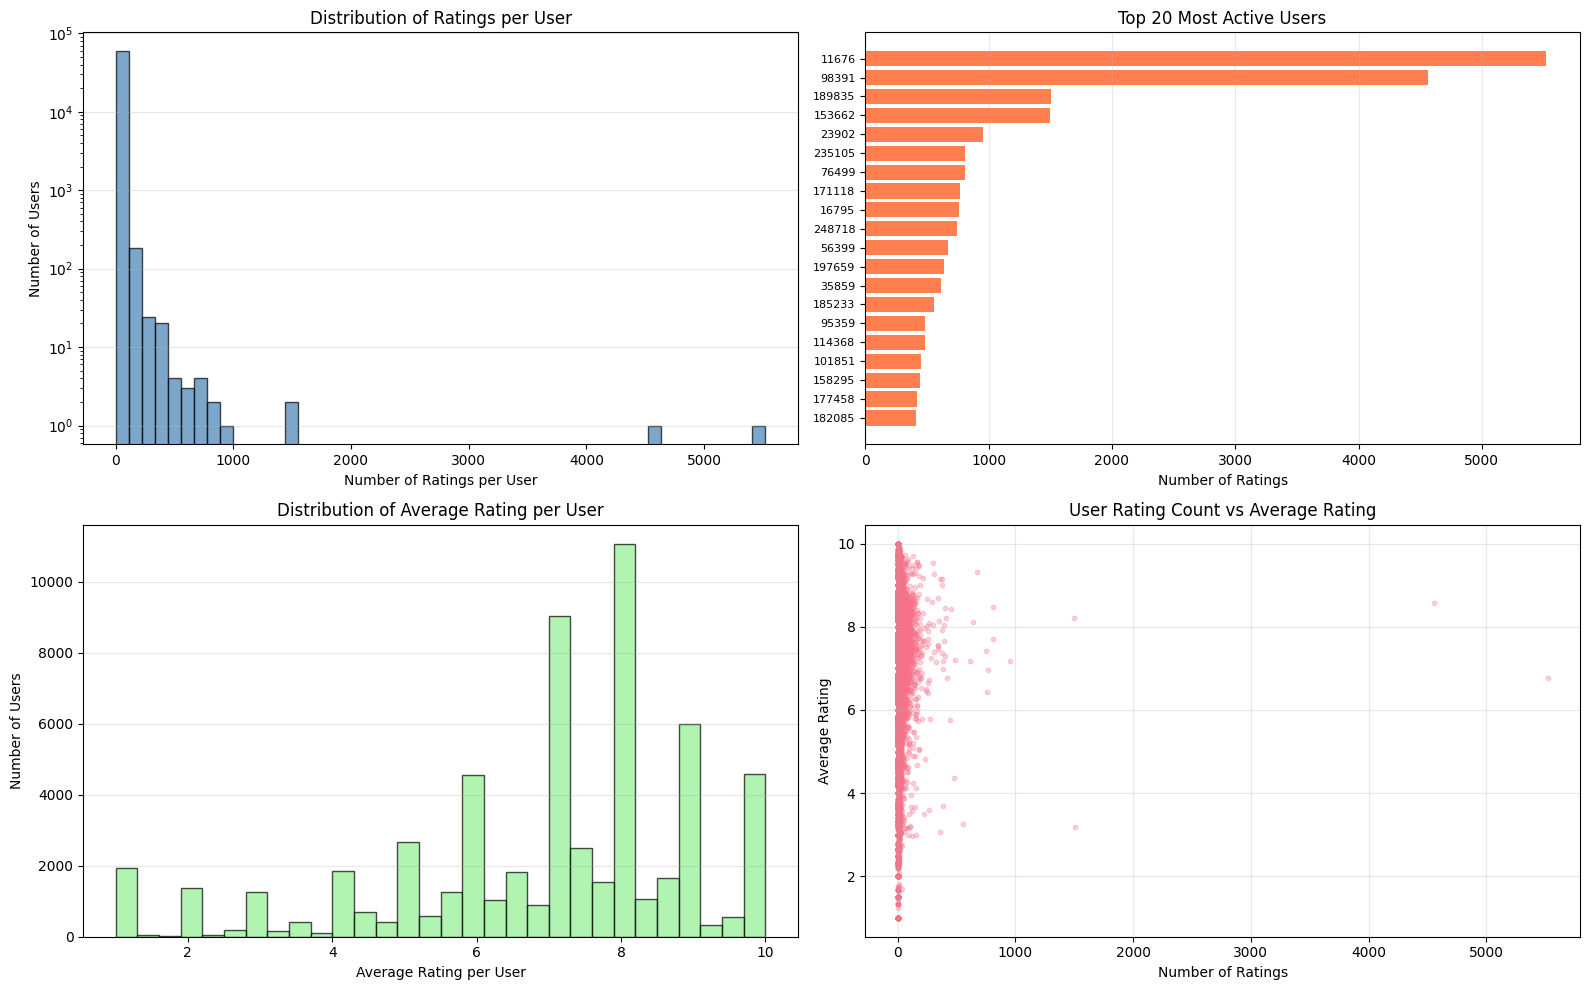

In [5]:
# User 분석
print("=" * 80)
print("USER ANALYSIS")
print("=" * 80)

print(f"Total users: {ratings['user_id'].nunique():,}")
print(f"Total ratings: {len(ratings):,}")
print(f"Average ratings per user: {len(ratings) / ratings['user_id'].nunique():.2f}")

# 사용자별 평점 수
user_rating_counts = ratings['user_id'].value_counts()
print(f"\nRatings per user statistics:")
print(user_rating_counts.describe())

print(f"\nTop 20 users by rating count:")
print(user_rating_counts.head(20))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 사용자별 평점 수 분포
axes[0, 0].hist(user_rating_counts.values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Number of Ratings per User')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].set_title('Distribution of Ratings per User')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(axis='y', alpha=0.3)

# Top 20 활발한 사용자
top_users = user_rating_counts.head(20)
axes[0, 1].barh(range(len(top_users)), top_users.values, color='coral')
axes[0, 1].set_yticks(range(len(top_users)))
axes[0, 1].set_yticklabels(top_users.index, fontsize=8)
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_title('Top 20 Most Active Users')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# 사용자별 평균 평점
user_avg_rating = ratings.groupby('user_id')['rating'].mean()
axes[1, 0].hist(user_avg_rating.values, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Average Rating per User')
axes[1, 0].set_ylabel('Number of Users')
axes[1, 0].set_title('Distribution of Average Rating per User')
axes[1, 0].grid(axis='y', alpha=0.3)

# 사용자별 평점 수 vs 평균 평점
user_stats = pd.DataFrame({
    'rating_count': user_rating_counts,
    'avg_rating': user_avg_rating
})
axes[1, 1].scatter(user_stats['rating_count'], user_stats['avg_rating'], alpha=0.3, s=10)
axes[1, 1].set_xlabel('Number of Ratings')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('User Rating Count vs Average Rating')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### ISBN (책) 분석 - 책별 평점 수, Top 20 인기 책, 평균 평점 분포, 상관관계

ISBN (BOOK) ANALYSIS
Total ISBNs: 129,777
Total ratings: 306,795
Average ratings per book: 2.36

Ratings per book statistics:
count    129777.000000
mean          2.364017
std           6.410544
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         566.000000
Name: count, dtype: float64

Top 20 books by rating count:
isbn
0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
059035342X    251
0142001740    246
0446672211    236
044023722X    225
0452282152    223
0316601950    218
0671027360    216
067976402X    205
0316769487    195
0786868716    193
0743418174    188
0345337662    184
0375727345    183
0156027321    181
0312278586    181
Name: count, dtype: int64


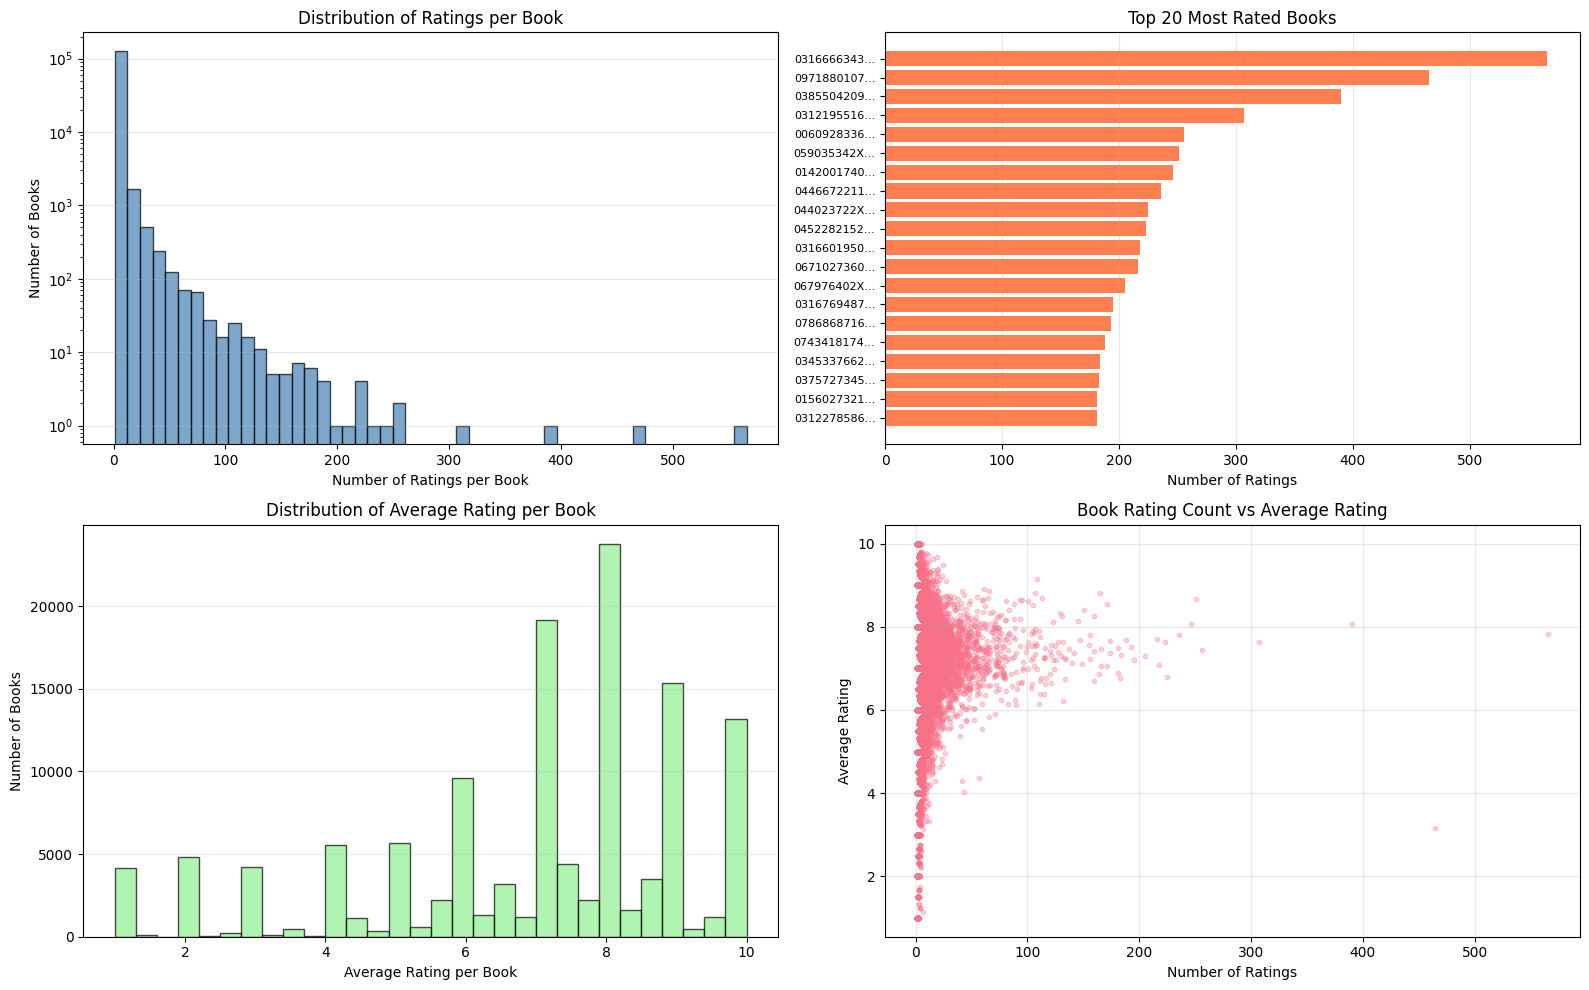

In [6]:
# ISBN (책) 분석
print("=" * 80)
print("ISBN (BOOK) ANALYSIS")
print("=" * 80)

print(f"Total ISBNs: {ratings['isbn'].nunique():,}")
print(f"Total ratings: {len(ratings):,}")
print(f"Average ratings per book: {len(ratings) / ratings['isbn'].nunique():.2f}")

# 책별 평점 수
isbn_rating_counts = ratings['isbn'].value_counts()
print(f"\nRatings per book statistics:")
print(isbn_rating_counts.describe())

print(f"\nTop 20 books by rating count:")
print(isbn_rating_counts.head(20))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 책별 평점 수 분포
axes[0, 0].hist(isbn_rating_counts.values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Number of Ratings per Book')
axes[0, 0].set_ylabel('Number of Books')
axes[0, 0].set_title('Distribution of Ratings per Book')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(axis='y', alpha=0.3)

# Top 20 인기 책
top_books = isbn_rating_counts.head(20)
axes[0, 1].barh(range(len(top_books)), top_books.values, color='coral')
axes[0, 1].set_yticks(range(len(top_books)))
axes[0, 1].set_yticklabels([str(isbn)[:15] + '...' for isbn in top_books.index], fontsize=8)
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_title('Top 20 Most Rated Books')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# 책별 평균 평점
isbn_avg_rating = ratings.groupby('isbn')['rating'].mean()
axes[1, 0].hist(isbn_avg_rating.values, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Average Rating per Book')
axes[1, 0].set_ylabel('Number of Books')
axes[1, 0].set_title('Distribution of Average Rating per Book')
axes[1, 0].grid(axis='y', alpha=0.3)

# 책별 평점 수 vs 평균 평점
isbn_stats = pd.DataFrame({
    'rating_count': isbn_rating_counts,
    'avg_rating': isbn_avg_rating
})
axes[1, 1].scatter(isbn_stats['rating_count'], isbn_stats['avg_rating'], alpha=0.3, s=10)
axes[1, 1].set_xlabel('Number of Ratings')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Book Rating Count vs Average Rating')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 데이터 희소성 분석 - Sparsity 계산, Cold start 분석, 누적 분포, 평점 매트릭스 히트맵

DATA SPARSITY ANALYSIS
Number of users: 59,803
Number of books: 129,777
Number of ratings: 306,795
Possible ratings: 7,761,053,931
Sparsity: 99.9960%
Density: 0.0040%

Cold start analysis:
Users with only 1 rating: 34,617 (57.89%)
Books with only 1 rating: 88,392 (68.11%)


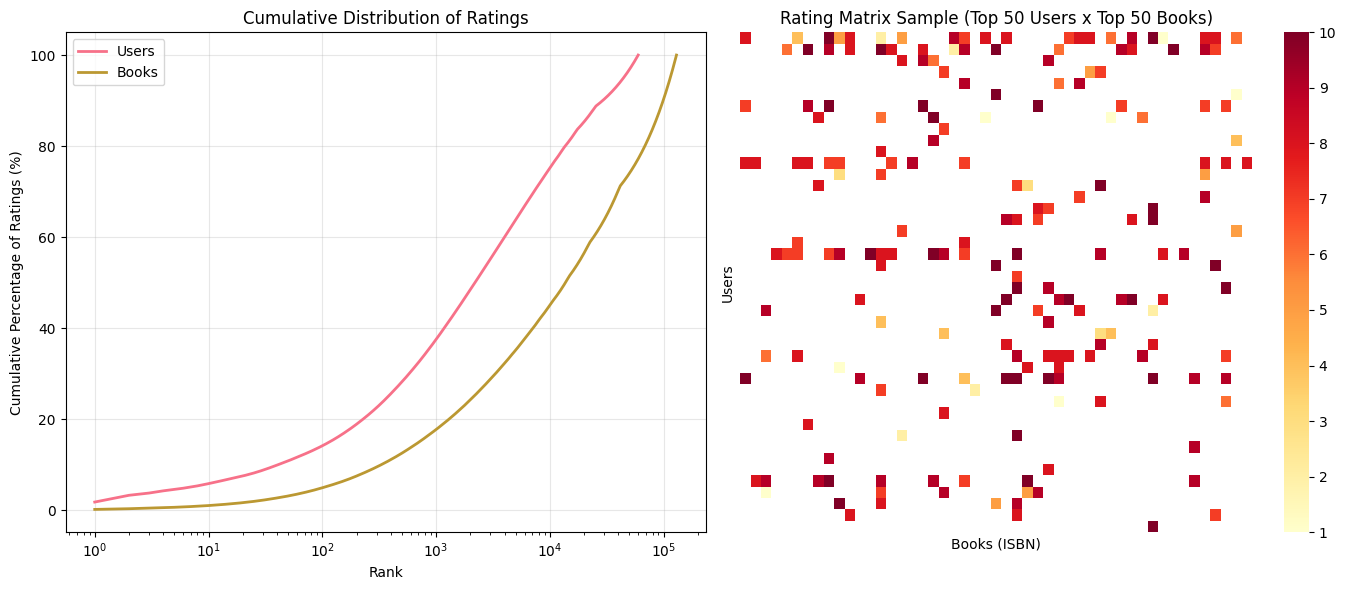

In [7]:
# 데이터 희소성 (Sparsity) 분석
print("=" * 80)
print("DATA SPARSITY ANALYSIS")
print("=" * 80)

n_users = ratings['user_id'].nunique()
n_books = ratings['isbn'].nunique()
n_ratings = len(ratings)
possible_ratings = n_users * n_books

sparsity = 100 * (1 - n_ratings / possible_ratings)
print(f"Number of users: {n_users:,}")
print(f"Number of books: {n_books:,}")
print(f"Number of ratings: {n_ratings:,}")
print(f"Possible ratings: {possible_ratings:,}")
print(f"Sparsity: {sparsity:.4f}%")
print(f"Density: {100 - sparsity:.4f}%")

# Cold start 문제 분석
users_1_rating = (user_rating_counts == 1).sum()
books_1_rating = (isbn_rating_counts == 1).sum()

print(f"\nCold start analysis:")
print(f"Users with only 1 rating: {users_1_rating:,} ({users_1_rating/n_users*100:.2f}%)")
print(f"Books with only 1 rating: {books_1_rating:,} ({books_1_rating/n_books*100:.2f}%)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 사용자 및 책 평점 수 분포 비교 (cumulative)
user_cumsum = np.cumsum(np.sort(user_rating_counts.values)[::-1])
book_cumsum = np.cumsum(np.sort(isbn_rating_counts.values)[::-1])

axes[0].plot(range(1, len(user_cumsum)+1), user_cumsum / user_cumsum[-1] * 100, label='Users', linewidth=2)
axes[0].plot(range(1, len(book_cumsum)+1), book_cumsum / book_cumsum[-1] * 100, label='Books', linewidth=2)
axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Cumulative Percentage of Ratings (%)')
axes[0].set_title('Cumulative Distribution of Ratings')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 평점 매트릭스 샘플 히트맵
sample_users = ratings['user_id'].value_counts().head(50).index
sample_books = ratings['isbn'].value_counts().head(50).index
sample_ratings = ratings[ratings['user_id'].isin(sample_users) & ratings['isbn'].isin(sample_books)]
rating_matrix = sample_ratings.pivot_table(index='user_id', columns='isbn', values='rating')

sns.heatmap(rating_matrix, cmap='YlOrRd', cbar=True, xticklabels=False, yticklabels=False, ax=axes[1])
axes[1].set_title('Rating Matrix Sample (Top 50 Users x Top 50 Books)')
axes[1].set_xlabel('Books (ISBN)')
axes[1].set_ylabel('Users')

plt.tight_layout()
plt.show()

### Rating 분포 세부 분석 - 고/중/저평점 비율, 누적 분포

RATING DISTRIBUTION DETAILS
Rating 1: 13,249 (4.32%)
Rating 2: 12,929 (4.21%)
Rating 3: 10,520 (3.43%)
Rating 4: 12,707 (4.14%)
Rating 5: 14,111 (4.60%)
Rating 6: 25,311 (8.25%)
Rating 7: 52,928 (17.25%)
Rating 8: 73,593 (23.99%)
Rating 9: 48,673 (15.86%)
Rating 10: 42,774 (13.94%)

Rating categories:
High ratings (8-10): 165,040 (53.79%)
Mid ratings (6-7): 78,239 (25.50%)
Low ratings (1-5): 63,516 (20.70%)


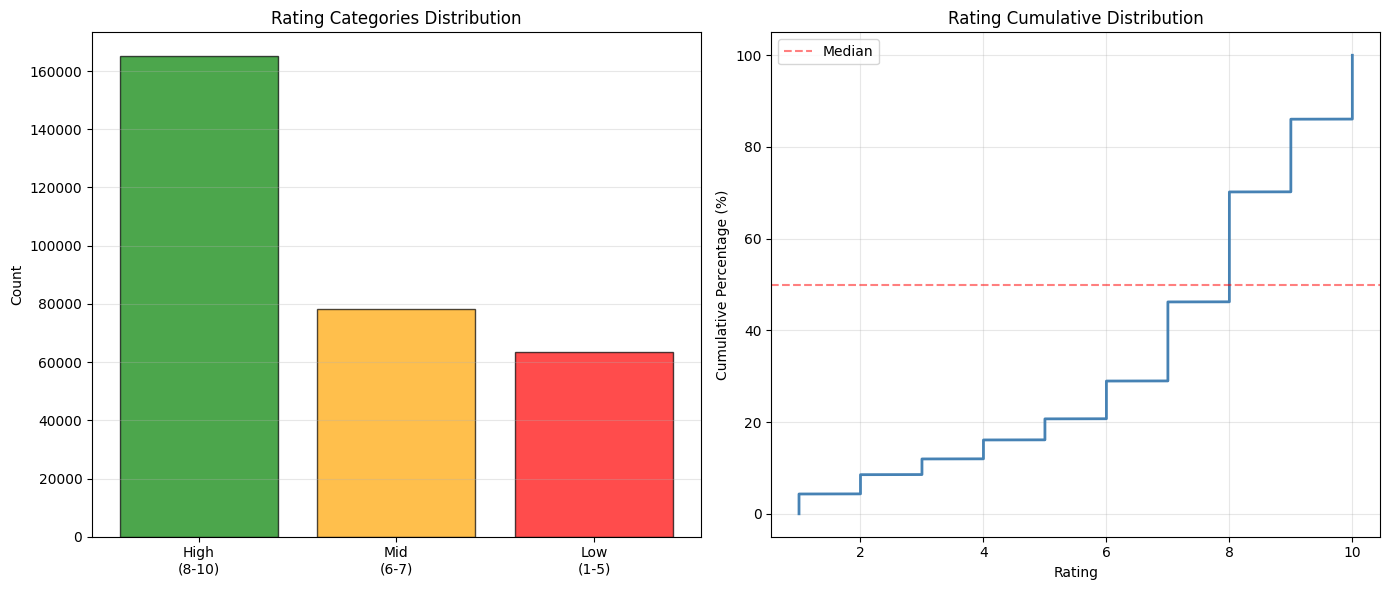

In [8]:
# Rating 분포 세부 분석
print("=" * 80)
print("RATING DISTRIBUTION DETAILS")
print("=" * 80)

# 평점별 통계
for rating_val in sorted(ratings['rating'].unique()):
    count = (ratings['rating'] == rating_val).sum()
    pct = count / len(ratings) * 100
    print(f"Rating {rating_val}: {count:,} ({pct:.2f}%)")

# 고평점 vs 저평점
high_ratings = ratings[ratings['rating'] >= 8]
low_ratings = ratings[ratings['rating'] <= 5]
mid_ratings = ratings[(ratings['rating'] > 5) & (ratings['rating'] < 8)]

print(f"\nRating categories:")
print(f"High ratings (8-10): {len(high_ratings):,} ({len(high_ratings)/len(ratings)*100:.2f}%)")
print(f"Mid ratings (6-7): {len(mid_ratings):,} ({len(mid_ratings)/len(ratings)*100:.2f}%)")
print(f"Low ratings (1-5): {len(low_ratings):,} ({len(low_ratings)/len(ratings)*100:.2f}%)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 평점 카테고리별 비율
categories = ['High\n(8-10)', 'Mid\n(6-7)', 'Low\n(1-5)']
values = [len(high_ratings), len(mid_ratings), len(low_ratings)]
colors_cat = ['green', 'orange', 'red']

axes[0].bar(categories, values, color=colors_cat, edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Rating Categories Distribution')
axes[0].grid(axis='y', alpha=0.3)

# 누적 분포
rating_sorted = ratings['rating'].sort_values()
cumulative = np.arange(1, len(rating_sorted) + 1) / len(rating_sorted) * 100
axes[1].plot(rating_sorted, cumulative, linewidth=2, color='steelblue')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].set_title('Rating Cumulative Distribution')
axes[1].grid(alpha=0.3)
axes[1].axhline(50, color='red', linestyle='--', alpha=0.5, label='Median')
axes[1].legend()

plt.tight_layout()
plt.show()

### 종합 요약 통계 - 주요 지표 종합

In [9]:
# 종합 요약 통계
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Total Ratings': f"{len(ratings):,}",
    'Unique Users': f"{ratings['user_id'].nunique():,}",
    'Unique Books (ISBN)': f"{ratings['isbn'].nunique():,}",
    'Avg Ratings per User': f"{len(ratings) / ratings['user_id'].nunique():.2f}",
    'Avg Ratings per Book': f"{len(ratings) / ratings['isbn'].nunique():.2f}",
    'Rating Range': f"{ratings['rating'].min()} - {ratings['rating'].max()}",
    'Mean Rating': f"{ratings['rating'].mean():.2f}",
    'Median Rating': f"{ratings['rating'].median():.2f}",
    'Std Rating': f"{ratings['rating'].std():.2f}",
    'Most Common Rating': ratings['rating'].mode()[0],
    'Sparsity': f"{sparsity:.4f}%",
    'Density': f"{100 - sparsity:.4f}%",
    'Users with 1 Rating': f"{users_1_rating:,} ({users_1_rating/n_users*100:.2f}%)",
    'Books with 1 Rating': f"{books_1_rating:,} ({books_1_rating/n_books*100:.2f}%)",
    'High Ratings (8-10)': f"{len(high_ratings):,} ({len(high_ratings)/len(ratings)*100:.2f}%)",
    'Mid Ratings (6-7)': f"{len(mid_ratings):,} ({len(mid_ratings)/len(ratings)*100:.2f}%)",
    'Low Ratings (1-5)': f"{len(low_ratings):,} ({len(low_ratings)/len(ratings)*100:.2f}%)",
}

for key, value in summary_stats.items():
    print(f"{key:.<45} {value}")

print("=" * 80)

SUMMARY STATISTICS
Total Ratings................................ 306,795
Unique Users................................. 59,803
Unique Books (ISBN).......................... 129,777
Avg Ratings per User......................... 5.13
Avg Ratings per Book......................... 2.36
Rating Range................................. 1 - 10
Mean Rating.................................. 7.07
Median Rating................................ 8.00
Std Rating................................... 2.43
Most Common Rating........................... 8
Sparsity..................................... 99.9960%
Density...................................... 0.0040%
Users with 1 Rating.......................... 34,617 (57.89%)
Books with 1 Rating.......................... 88,392 (68.11%)
High Ratings (8-10).......................... 165,040 (53.79%)
Mid Ratings (6-7)............................ 78,239 (25.50%)
Low Ratings (1-5)............................ 63,516 (20.70%)


### 종합 시각화 대시보드 - 전체 EDA를 한눈에 볼 수 있는 종합 시각화

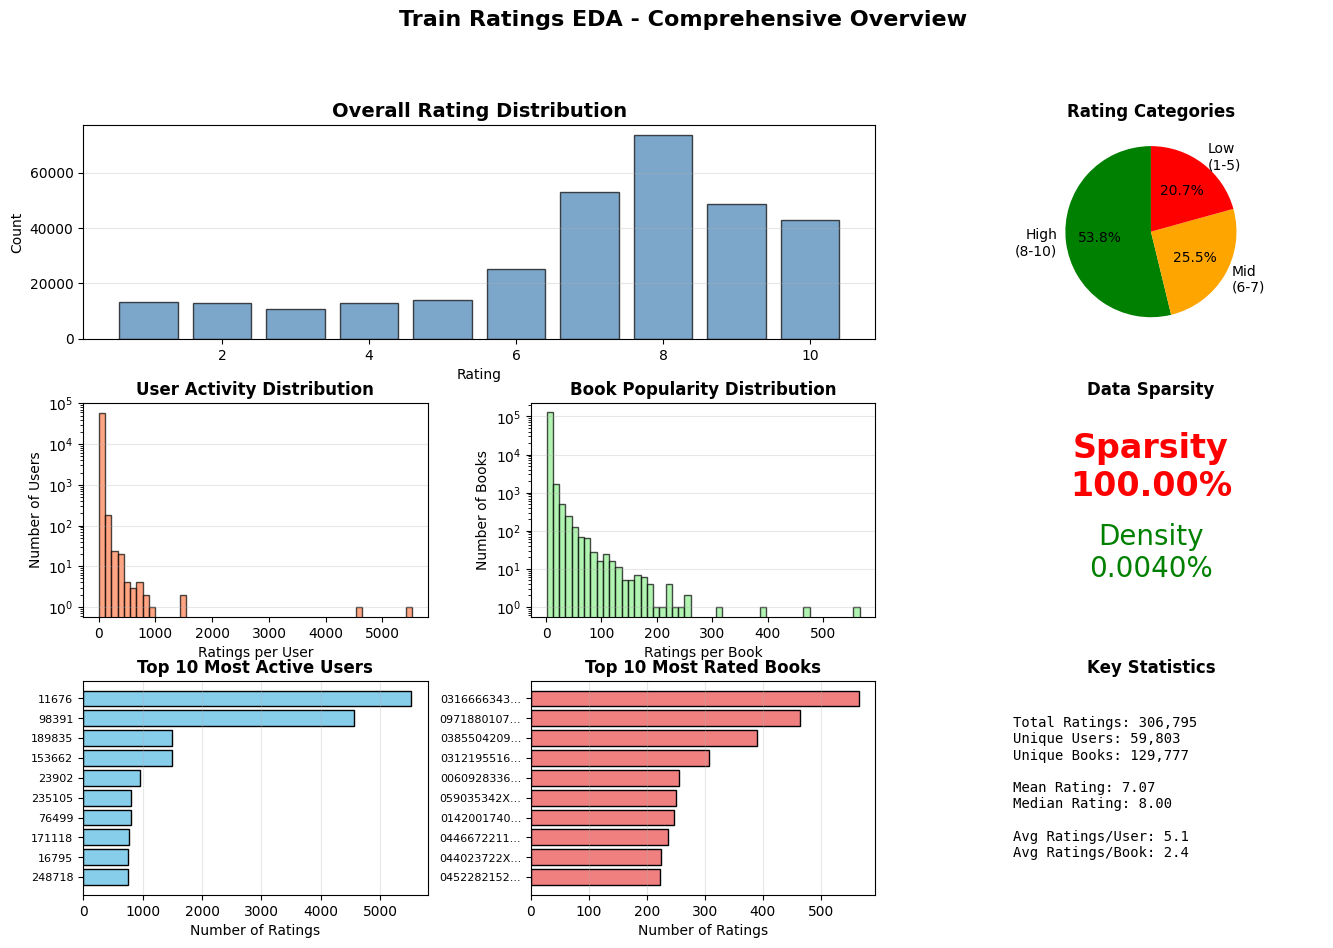


TRAIN RATINGS EDA COMPLETE


In [10]:
# 종합 시각화
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Rating 분포
ax1 = fig.add_subplot(gs[0, :2])
rating_counts = ratings['rating'].value_counts().sort_index()
ax1.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.set_title('Overall Rating Distribution', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. 평점 비율 파이
ax2 = fig.add_subplot(gs[0, 2])
ax2.pie([len(high_ratings), len(mid_ratings), len(low_ratings)], 
        labels=['High\n(8-10)', 'Mid\n(6-7)', 'Low\n(1-5)'],
        autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
ax2.set_title('Rating Categories', fontsize=12, fontweight='bold')

# 3. User 활동 분포
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(user_rating_counts.values, bins=50, edgecolor='black', alpha=0.7, color='coral')
ax3.set_xlabel('Ratings per User')
ax3.set_ylabel('Number of Users')
ax3.set_title('User Activity Distribution', fontsize=12, fontweight='bold')
ax3.set_yscale('log')
ax3.grid(axis='y', alpha=0.3)

# 4. Book 인기도 분포
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(isbn_rating_counts.values, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
ax4.set_xlabel('Ratings per Book')
ax4.set_ylabel('Number of Books')
ax4.set_title('Book Popularity Distribution', fontsize=12, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(axis='y', alpha=0.3)

# 5. 데이터 희소성
ax5 = fig.add_subplot(gs[1, 2])
ax5.text(0.5, 0.7, f'Sparsity\n{sparsity:.2f}%', ha='center', va='center', fontsize=24, fontweight='bold', color='red')
ax5.text(0.5, 0.3, f'Density\n{100-sparsity:.4f}%', ha='center', va='center', fontsize=20, color='green')
ax5.set_xlim(0, 1)
ax5.set_ylim(0, 1)
ax5.axis('off')
ax5.set_title('Data Sparsity', fontsize=12, fontweight='bold')

# 6. Top 10 활발한 사용자
ax6 = fig.add_subplot(gs[2, 0])
top_10_users = user_rating_counts.head(10)
ax6.barh(range(len(top_10_users)), top_10_users.values, color='skyblue', edgecolor='black')
ax6.set_yticks(range(len(top_10_users)))
ax6.set_yticklabels(top_10_users.index, fontsize=8)
ax6.set_xlabel('Number of Ratings')
ax6.set_title('Top 10 Most Active Users', fontsize=12, fontweight='bold')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# 7. Top 10 인기 책
ax7 = fig.add_subplot(gs[2, 1])
top_10_books = isbn_rating_counts.head(10)
ax7.barh(range(len(top_10_books)), top_10_books.values, color='lightcoral', edgecolor='black')
ax7.set_yticks(range(len(top_10_books)))
ax7.set_yticklabels([str(isbn)[:10] + '...' for isbn in top_10_books.index], fontsize=8)
ax7.set_xlabel('Number of Ratings')
ax7.set_title('Top 10 Most Rated Books', fontsize=12, fontweight='bold')
ax7.invert_yaxis()
ax7.grid(axis='x', alpha=0.3)

# 8. 주요 통계
ax8 = fig.add_subplot(gs[2, 2])
stats_text = f"""
Total Ratings: {len(ratings):,}
Unique Users: {ratings['user_id'].nunique():,}
Unique Books: {ratings['isbn'].nunique():,}

Mean Rating: {ratings['rating'].mean():.2f}
Median Rating: {ratings['rating'].median():.2f}

Avg Ratings/User: {len(ratings)/ratings['user_id'].nunique():.1f}
Avg Ratings/Book: {len(ratings)/ratings['isbn'].nunique():.1f}
"""
ax8.text(0.1, 0.5, stats_text, ha='left', va='center', fontsize=10, family='monospace')
ax8.set_xlim(0, 1)
ax8.set_ylim(0, 1)
ax8.axis('off')
ax8.set_title('Key Statistics', fontsize=12, fontweight='bold')

plt.suptitle('Train Ratings EDA - Comprehensive Overview', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n" + "=" * 80)
print("TRAIN RATINGS EDA COMPLETE")
print("=" * 80)